# Predicting Student Depression: A Big Data Analytics Approach with Apache Spark

- **Author:** David Araba
- **Student ID:** 48093143
- **Course:** INFS3208 - Cloud Computing
- **Date:** October 2025

## 1. Introduction & Project Goals

### 1.1. Objective
The primary objective of this project is to develop and evaluate a suite of machine learning models using Apache Spark to predict the likelihood of depression among students. By leveraging a comprehensive dataset that includes demographic, academic, and lifestyle factors, I aim to identify key indicators associated with mental health challenges in an academic environment.

### 1.2. Significance
Student mental health is a growing concern globally. The pressures of academic life, combined with financial and social stressors, can significantly impact a student's well-being and academic performance. This project is important because it seeks to create a data-driven framework that could potentially identify at-risk students, enabling educational institutions to offer timely and targeted support. By using scalable cloud computing technologies, we can build a foundation for a system capable of handling large-scale, real-world student data, moving from reactive to proactive mental wellness strategies. This aligns with the need for modern solutions that traditional computing can struggle to scale effectively.

### 1.3. Technical Stack
This project will be implemented using the following technologies:
* **Language:** Python 3.x
* **Core Engine:** Apache Spark (via PySpark)
* **Libraries:**
    * **Spark MLlib:** For building scalable machine learning pipelines.
    * **Pandas:** For initial data handling and manipulation.
    * **Matplotlib & Seaborn:** For data visualisation and result interpretation.

## 2. Project Architecture & Workflow


### 2.1. Workflow Description
This project follows a standard big data analytics workflow, as depicted in the diagram below. The process begins with the ingestion of four separate but related data files into the Spark environment. These datasets are then joined and pre-processed to create a unified, analysis-ready master dataset. Subsequently, this dataset is used to train and evaluate four distinct machine learning functionalities as required by the project specification: classification, regression, clustering, and association rule mining. The final insights and model performance metrics are then visualised to provide clear, interpretable results.

### 2.2. Architecture Diagram
This diagram illustrates the project's workflow from data source to final analysis. It explicitly shows the use of multiple data sources and the application of various Spark MLlib functionalities, fulfilling the key project requirements.


### 2.3. Architecture Explanation
The above workflow diagram demonstrates a comprehensive big data analytics pipeline designed for scalable student mental health analysis. The process begins with four distinct data sources being ingested simultaneously into the Spark environment, leveraging Spark's distributed processing capabilities to handle large-scale datasets efficiently. The unified master dataset is then processed through feature engineering pipelines before being split for model training and evaluation. The four ML functionalities operate in parallel, each addressing different aspects of student mental health prediction and analysis. This architecture showcases the power of cloud computing technologies in handling complex, multi-dimensional data analysis tasks that would be challenging with traditional single-machine approaches.


## 3. Environment Setup
This section prepares the notebook's environment. The first part imports all necessary libraries for the project, including `pyspark` for distributed data processing, `pyspark.ml` for machine learning, and `matplotlib` for visualisation. The second part initialises the `SparkSession`, which is the essential entry point to all of Spark's functionalities.

In [ ]:
# Part 0: Project Initialisation & Overview
# 3. Environment Setup

# 3.1. Import All Necessary Libraries
# ---

# Spark libraries for session management, data manipulation, and ML
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, expr, avg, mean, array
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import BinaryClassificationEvaluator, RegressionEvaluator, ClusteringEvaluator
from pyspark.ml.fpm import FPGrowth
from pyspark.ml import Pipeline



# Standard Python libraries for data handling and plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

# 3.2. Initialise Spark Session
# ---
# Create a SparkSession, which is the entry point to any Spark functionality.
# - appName: Sets a name for the application, which will appear in the Spark UI.
# - getOrCreate(): Gets an existing SparkSession or, if there is none, creates a new one.
spark = SparkSession.builder \
    .appName("StudentMentalHealthPrediction") \
    .getOrCreate()

print(f"Spark session created successfully. Version: {spark.version}")

Libraries imported successfully.
Spark session created successfully. Version: 4.0.1


## Part 1: Data Loading and Exploratory Data Analysis (EDA)

This section focuses on the initial steps of our data science workflow as outlined in the project structure. We will load our datasets, merge them into a unified DataFrame, conduct an initial inspection to understand its structure and quality, and then perform exploratory visualizations to uncover key patterns.

### 1.1 Ingest and Merge Datasets

First, we load the four separate CSV files (`student_info.csv`, `academic_data.csv`, `lifestyle_data.csv`, and `mental_health.csv`) into individual Spark DataFrames. We then perform a series of inner joins on the `id` column to create a single, unified master dataset for our analysis.

In [7]:
# Define the file paths relative to the 'notebooks' directory
path_info = '../data/student_info.csv'
path_academic = '../data/academic_data.csv'
path_lifestyle = '../data/lifestyle_data.csv'
path_mental = '../data/mental_health.csv'

# Load each CSV file into a separate Spark DataFrame
sdf_info = spark.read.csv(path_info, header=True, inferSchema=True)
sdf_academic = spark.read.csv(path_academic, header=True, inferSchema=True)
sdf_lifestyle = spark.read.csv(path_lifestyle, header=True, inferSchema=True)
sdf_mental = spark.read.csv(path_mental, header=True, inferSchema=True)

# Perform a series of inner joins on the 'id' column
master_df = sdf_info.join(sdf_academic, "id", "inner") \
                    .join(sdf_lifestyle, "id", "inner") \
                    .join(sdf_mental, "id", "inner")

# Show the first 5 rows and verify the total count to confirm the merge
print("Successfully merged all data sources. Displaying a sample:")
master_df.show(5)
print(f"The master DataFrame contains {master_df.count()} rows.")

Successfully merged all data sources. Displaying a sample:
+---+------+----+-------------+----------+-------+----+-----------------+-------------+------------------+----------------+----------------+-------------------+--------------+----------------+--------------------------------+-------------------------------------+----------+
| id|Gender| Age|         City|Profession| Degree|CGPA|Academic Pressure|Work Pressure|Study Satisfaction|Job Satisfaction|Work/Study Hours|     Sleep Duration|Dietary Habits|Financial Stress|Family History of Mental Illness|Have you ever had suicidal thoughts ?|Depression|
+---+------+----+-------------+----------+-------+----+-----------------+-------------+------------------+----------------+----------------+-------------------+--------------+----------------+--------------------------------+-------------------------------------+----------+
|  2|  Male|33.0|Visakhapatnam|   Student|B.Pharm|8.97|              5.0|          0.0|               2.0|          

### 1.2 Initial Data Inspection

Now that the data is merged, we perform an initial inspection to understand its structure and identify potential data quality issues. We use `.printSchema()` to review column names and data types and `.describe().show()` to get a statistical summary of the numerical columns. This step is crucial for spotting inconsistencies, such as numerical data being incorrectly read as strings.

In [8]:
# Print the schema to check column names and data types
print("Schema of the master DataFrame:")
master_df.printSchema()

# Get a statistical summary of the numerical features
print("\nStatistical summary of numerical features:")
master_df.describe().show()

Schema of the master DataFrame:
root
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Profession: string (nullable = true)
 |-- Degree: string (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Academic Pressure: double (nullable = true)
 |-- Work Pressure: double (nullable = true)
 |-- Study Satisfaction: double (nullable = true)
 |-- Job Satisfaction: double (nullable = true)
 |-- Work/Study Hours: double (nullable = true)
 |-- Sleep Duration: string (nullable = true)
 |-- Dietary Habits: string (nullable = true)
 |-- Financial Stress: string (nullable = true)
 |-- Family History of Mental Illness: string (nullable = true)
 |-- Have you ever had suicidal thoughts ?: string (nullable = true)
 |-- Depression: integer (nullable = true)


Statistical summary of numerical features:


+-------+-----------------+------+-----------------+-------------+----------------+----------+------------------+------------------+--------------------+------------------+--------------------+------------------+--------------+--------------+------------------+--------------------------------+-------------------------------------+------------------+
|summary|               id|Gender|              Age|         City|      Profession|    Degree|              CGPA| Academic Pressure|       Work Pressure|Study Satisfaction|    Job Satisfaction|  Work/Study Hours|Sleep Duration|Dietary Habits|  Financial Stress|Family History of Mental Illness|Have you ever had suicidal thoughts ?|        Depression|
+-------+-----------------+------+-----------------+-------------+----------------+----------+------------------+------------------+--------------------+------------------+--------------------+------------------+--------------+--------------+------------------+--------------------------------+--

The schema and summary statistics immediately highlight a data quality issue. While most columns are correctly typed, the `.describe()` output shows a `'?'` value in the `max` row for `Financial Stress`, confirming it was incorrectly read as a `string`. This prevents proper statistical analysis and must be corrected.

### 1.3 Data Type Correction and Quality Check

The initial inspection confirmed that columns intended to be numerical, such as `Financial Stress`, were incorrectly inferred as a `string` type due to `'?'` placeholder values. To rectify this, we will explicitly cast all numerical columns to a `double` type. Using `try_cast` is essential as it will gracefully convert these placeholders into `NULL` values.

After this correction, we'll perform a systematic check for null values to see the full extent of the missing data that needs to be handled in the pre-processing stage.

In [ ]:
# --- Data Type Correction and Column Definitions ---
categorical_cols = [
    'Gender', 'City', 'Profession', 'Degree', 'Sleep Duration', 
    'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'
]

numerical_cols = [
    'Age', 'CGPA', 'Academic Pressure', 'Work Pressure',
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress'
]

# Create a copy of the master DataFrame to work with
df_corrected = master_df

# Explicitly cast numerical columns to a Double type, converting non-numeric values to NULL
for column in numerical_cols:
    df_corrected = df_corrected.withColumn(column, 
        expr(f"try_cast(`{column}` as double)")
    )

print("✅ Data types corrected successfully.")
print("\nVerifying the new schema:")
df_corrected.printSchema()

# --- Data Quality Check ---
# Now, check for nulls on the CORRECTED DataFrame
null_counts = [(c, df_corrected.where(col(c).isNull()).count()) for c in df_corrected.columns]

# Filter and display only columns that have at least one null value
null_df = pd.DataFrame(null_counts, columns=['Column', 'Null_Count'])
print("\nChecking for missing values after type correction:")
print(null_df[null_df['Null_Count'] > 0])

if null_df['Null_Count'].sum() == 0:
    print("\n✅ Great! No missing values found in the dataset.")
else:
    print("\n⚠️ Missing values were found. These will be handled in the pre-processing step.")

✅ Data types corrected successfully.

Verifying the new schema:
root
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Profession: string (nullable = true)
 |-- Degree: string (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Academic Pressure: double (nullable = true)
 |-- Work Pressure: double (nullable = true)
 |-- Study Satisfaction: double (nullable = true)
 |-- Job Satisfaction: double (nullable = true)
 |-- Work/Study Hours: double (nullable = true)
 |-- Sleep Duration: string (nullable = true)
 |-- Dietary Habits: string (nullable = true)
 |-- Financial Stress: double (nullable = true)
 |-- Family History of Mental Illness: string (nullable = true)
 |-- Have you ever had suicidal thoughts ?: string (nullable = true)
 |-- Depression: integer (nullable = true)


Checking for missing values after type correction:
              Column  Null_Count
14  Financial Stress         

The output confirms the data type correction was successful, with the schema now showing `Financial Stress` as a `double`. The subsequent null check demonstrates the effect of `try_cast`: the 3 non-numeric placeholder values have been correctly identified and converted into `NULL`. This provides a precise count of the missing data that must be addressed in the pre-processing step.

### 1.4 Exploratory Visualisation

With our data loaded and inspected, we now create visualizations to better understand the distributions of key features. This includes analyzing the balance of our target variable ('Depression') and exploring the distributions of important demographic and academic features. For ease of plotting, we convert the cleansed Spark DataFrame (`df_corrected`) to a Pandas DataFrame.

/var/folders/pb/_tjbfhc56dn278mvyl6zkn0h0000gn/T/ipykernel_3436/1564497617.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Depression', y='count', data=depression_counts, palette=custom_palette, order=['Depressed', 'Not Depressed'])


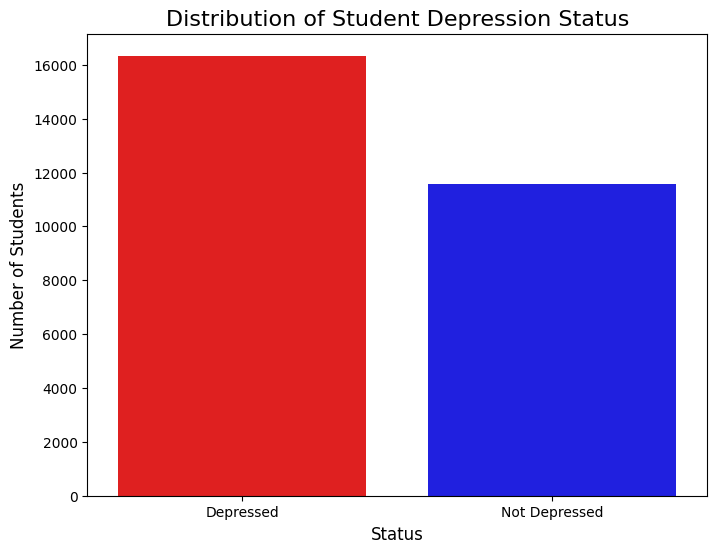

In [10]:
# --- Target Variable Distribution ---

# Aggregate the data in Spark to count occurrences of each class in the 'Depression' column
depression_counts = df_corrected.groupBy('Depression').count().toPandas()

# Map the numerical labels to meaningful names for the plot
depression_counts['Depression'] = depression_counts['Depression'].map({0: 'Not Depressed', 1: 'Depressed'})

# Create the plot using Seaborn with specified colors
plt.figure(figsize=(8, 6))
# Define a custom color palette
custom_palette = {'Depressed': 'red', 'Not Depressed': 'blue'}
sns.barplot(x='Depression', y='count', data=depression_counts, palette=custom_palette, order=['Depressed', 'Not Depressed'])
plt.title('Distribution of Student Depression Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.show()

The bar chart of our target variable reveals a moderate class imbalance. There are more students classified as 'Depressed' than 'Not Depressed' in this dataset. This is a critical observation that will influence how we evaluate our classification models later, as simple accuracy could be a misleading metric.

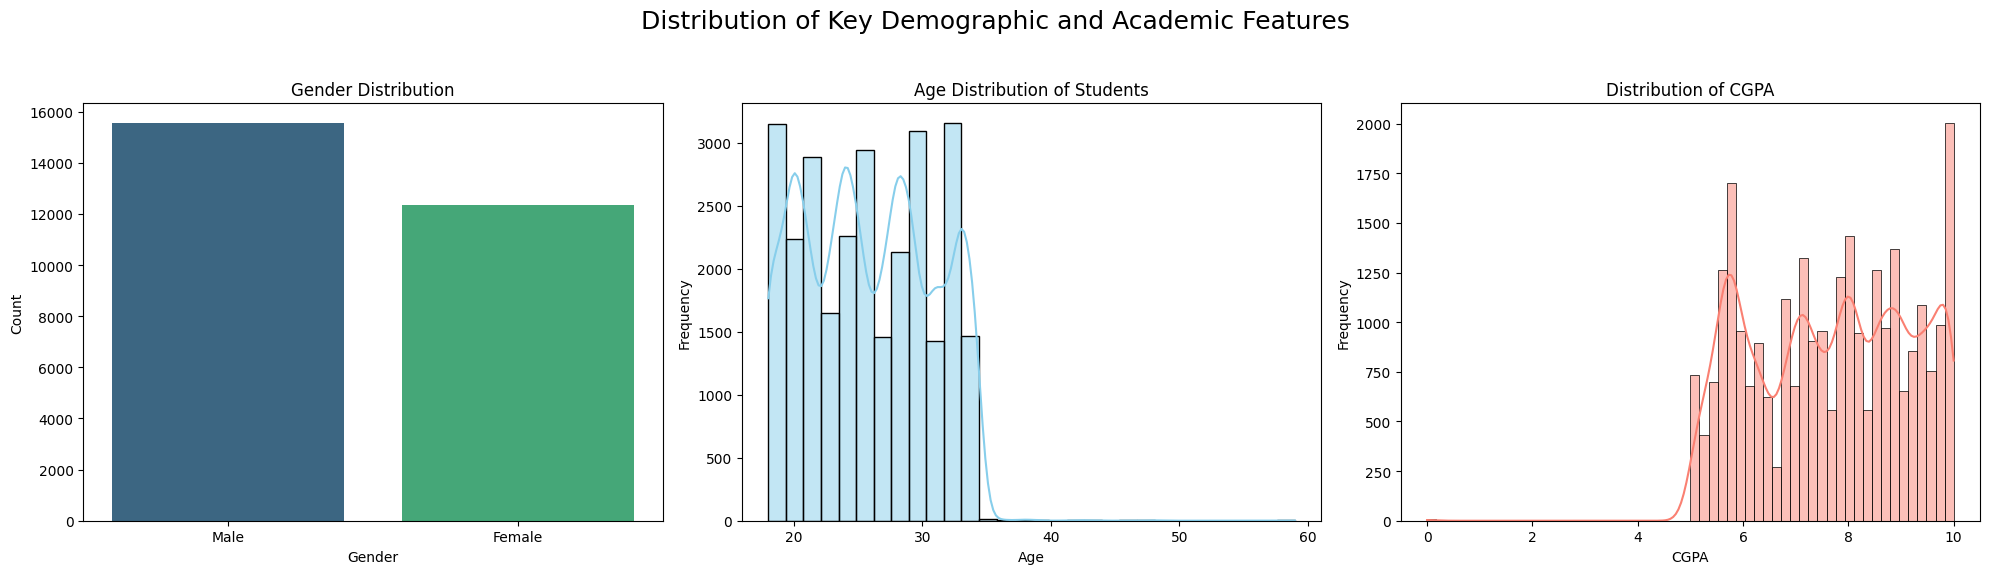

In [11]:
# Convert the corrected Spark DataFrame to a Pandas DataFrame for easier plotting
pandas_df = df_corrected.toPandas()

# --- Create a figure with multiple subplots for feature distributions ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Key Demographic and Academic Features', fontsize=18)

# 1. Gender Distribution (Code updated to resolve FutureWarning)
sns.countplot(ax=axes[0], x='Gender', data=pandas_df, hue='Gender', palette='viridis', legend=False)
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# 2. Age Distribution
sns.histplot(ax=axes[1], x='Age', data=pandas_df, kde=True, color='skyblue', bins=30)
axes[1].set_title('Age Distribution of Students')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# 3. CGPA Distribution
sns.histplot(ax=axes[2], x='CGPA', data=pandas_df, kde=True, color='salmon')
axes[2].set_title('Distribution of CGPA')
axes[2].set_xlabel('CGPA')
axes[2].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

These visualizations provide further insights into the dataset's composition:
* **Gender:** The dataset contains a higher number of male participants than female participants.
* **Age:** The age distribution is concentrated between 18 and 30 years, as expected for a student population, with several distinct peaks.
* **CGPA:** The CGPA distribution is highly unusual. It is left-skewed with sharp, distinct peaks at integer and half-integer values (e.g., 7.0, 7.5, 8.0). This strongly suggests that CGPA was either self-reported with rounding or originates from a discrete grading system, rather than being a continuous measure.

## Part 2: Feature Engineering & Pre-processing

This section prepares our clean, explored data for the machine learning models. The primary goal is to transform the dataset into a format suitable for Spark's MLlib library. This involves three key steps:

1. **Data Cleaning:** We will implement the strategy decided upon in Part 1 by handling the `NULL` values discovered in the `Financial Stress`.
2.  **Feature Transformation:** Machine learning models require numerical inputs, so we must convert our categorical text columns (like `Gender`, `City`, etc.) into a numerical format. We will use a standard two-step process with **`StringIndexer`** and **`OneHotEncoder`**.
3.  **Feature Assembling:** Finally, we will use **`VectorAssembler`** to combine all our individual feature columns into a single vector column. This is a mandatory step, as all Spark MLlib models expect this specific format for their input features.

### 2.1 Data Cleaning: Imputing Missing Values

As identified in the EDA phase, our type correction process created three `NULL` values in the `Financial Stress` column. Leaving these as `NULL` would cause errors during model training. A common and effective strategy for handling a small number of missing numerical values is imputation. Here, we replace the `NULL` values with the statistical **mean** of the entire column, preserving the overall distribution of the data without discarding valuable rows.

In [ ]:
# --- Handle Missing Values Created from try_cast ---

# Check for null values created by try_cast (from '?' values)
null_counts = [(c, df_corrected.where(col(c).isNull()).count()) for c in numerical_cols]
null_df = pd.DataFrame(null_counts, columns=['Column', 'Null_Count'])
print("Checking for null values created from try_cast:")
print(null_df[null_df['Null_Count'] > 0])

# Fill null values with column means
for column in numerical_cols:
    # Calculate mean for each column
    mean_val = df_corrected.select(mean(col(column))).collect()[0][0]
    if mean_val is not None:  # Only fill if mean exists
        df_corrected = df_corrected.fillna(mean_val, subset=[column])
        print(f"Filled null values in {column} with mean: {mean_val:.2f}")

print("✅ Data cleaning complete. All '?' values converted to column means.")

### 2.2 Feature Transformation: Encoding Categorical Variables

Machine learning algorithms require numerical input. Therefore, we must convert our text-based categorical columns (e.g., 'Gender', 'City') into a numerical format. We use a standard two-step process for each column:

1.  **`StringIndexer`**: This transformer assigns a unique numerical index to each unique category in a column (e.g., 'Male' -> 0.0, 'Female' -> 1.0).
2.  **`OneHotEncoder`**: This transformer takes the numerical index and converts it into a sparse binary vector. This prevents the model from incorrectly assuming an ordinal relationship between categories (e.g., that 'City B' is somehow "greater than" 'City A').

We create these two stages for every categorical column and add them to our pipeline.

In [ ]:
# --- Create a list of transformation stages ---
stages = []

# Iterate over each categorical column to create StringIndexer and OneHotEncoder stages
for column in categorical_cols:
    string_indexer = StringIndexer(inputCol=column, outputCol=column + "_Index")
    one_hot_encoder = OneHotEncoder(inputCols=[string_indexer.getOutputCol()], outputCols=[column + "_Vec"])
    stages += [string_indexer, one_hot_encoder]

print("StringIndexer and OneHotEncoder stages created.")

### 2.3 Feature Assembling

All Spark MLlib models expect the input features to be consolidated into a single vector column. We use `VectorAssembler` to achieve this. This final transformation stage gathers all our processed feature columns—both the original numerical columns and the new one-hot encoded vectors—and combines them into a single column named `features`.

In [ ]:
# Create a list of all feature columns (numerical + the new vector columns from OHE)
feature_cols = numerical_cols + [c + "_Vec" for c in categorical_cols]

# Create the VectorAssembler stage
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Add the assembler to our list of stages
stages += [vector_assembler]

print("VectorAssembler stage created.")

### 2.4 Executing the Pre-processing Pipeline

With all our stages defined (imputation handled separately, followed by indexing, encoding, and assembling), we combine them into a single `Pipeline`. A `Pipeline` is a powerful Spark MLlib tool that chains multiple transformers and estimators together to create a unified workflow.

We then `.fit()` the pipeline on our data to learn the necessary transformations (like the string-to-index mappings) and `.transform()` the data to apply them. The output below shows the final structure of our dataset, now ready for model training, with the `features` vector successfully created.

In [ ]:
# Create the full pre-processing pipeline with all our defined stages
preprocessing_pipeline = Pipeline(stages=stages)

# Fit the pipeline to our corrected data
pipeline_model = preprocessing_pipeline.fit(df_corrected)

# Transform the data to apply all the steps
transformed_df = pipeline_model.transform(df_corrected)

# Display the results to confirm the 'features' vector was created
print("Data transformation complete. Displaying the transformed DataFrame:")
transformed_df.select('id', 'Depression', 'features').show(5, truncate=False)

## Part 3: Machine Learning Modelling

This is the core implementation section of the project where we build, train, and evaluate our machine learning models. With our data now fully pre-processed, we will address a key assignment requirement by implementing **four distinct analytical tasks** using Spark MLlib.

The goal is to analyze the student dataset from multiple perspectives to uncover different types of insights. Our four chosen functionalities, as outlined in the project proposal, are:

* **1. Classification:** Predicting the likelihood of a student having depression.
* **2. Regression:** Predicting a student's academic performance (CGPA).
* **3. Clustering:** Identifying distinct groups or profiles of students based on their data.
* **4. Association Rule Mining:** Discovering hidden patterns or relationships between different factors.

Our first crucial step will be to split the data into training and testing sets. This ensures we can evaluate our supervised models on unseen data, providing an unbiased assessment of their predictive power.